Energy consumption across different regions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../code/')

In [3]:
from common import *

In [4]:
year = 2014
means = {}
for source in ['Austin','SanDiego','Boulder']:
    source_df, source_dfc, source_tensor, source_static = create_region_df_dfc_static(source, year)
    means[source] = source_df[['aggregate_{}'.format(month) for month in range(1, 13)]].mean()
    means[source].index = range(1, 13)


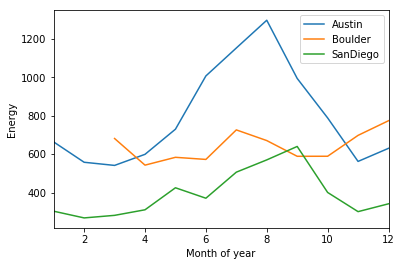

In [5]:
pd.DataFrame(means).plot()
plt.xlabel("Month of year")
plt.ylabel("Energy")

In [6]:
from plot_functions import latexify, format_axes

In [7]:
source_df

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,dr_11,dr_12,num_rooms,area,num_bedrooms,num_floors,area_first,area_second,area_third,total_occupants
232,NaN,NaN,NaN,NaN,NaN,52.174015,338.407410,334.595459,63.463852,15.140766,...,41.991898,50.297337,NaN,2228.0,NaN,NaN,1086.0,638.0,NaN,NaN
516,NaN,NaN,NaN,NaN,NaN,29.859417,NaN,NaN,4.907033,0.000000,...,NaN,NaN,NaN,2379.0,NaN,NaN,1522.0,117.0,NaN,NaN
547,NaN,NaN,NaN,NaN,0.484833,8.774734,34.373417,18.198683,8.908184,0.437633,...,91.064865,132.114410,NaN,2920.0,NaN,NaN,1772.0,1148.0,NaN,NaN
698,NaN,NaN,NaN,NaN,0.332917,3.947250,168.810211,61.519470,2.300000,0.118233,...,25.255083,18.351749,NaN,2370.0,NaN,NaN,966.0,756.0,NaN,NaN
1350,NaN,NaN,NaN,NaN,NaN,NaN,16.532484,65.803162,0.599133,3.867483,...,34.179649,14.531684,NaN,2332.0,NaN,NaN,786.0,798.0,NaN,NaN
1766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.101002,47.156418,NaN,2564.0,NaN,NaN,1498.0,1066.0,NaN,NaN
1879,NaN,NaN,NaN,NaN,49.582718,166.131134,294.709778,174.642090,0.552867,0.146300,...,NaN,NaN,NaN,4123.0,NaN,NaN,1773.0,1200.0,NaN,NaN
2144,NaN,NaN,NaN,NaN,NaN,334.579498,598.515564,490.403564,303.959320,NaN,...,NaN,NaN,NaN,1539.0,NaN,NaN,798.0,741.0,NaN,NaN
2523,NaN,NaN,NaN,NaN,10.968667,70.435928,135.648438,70.280182,15.237200,8.047383,...,NaN,NaN,NaN,4306.0,NaN,NaN,2464.0,400.0,NaN,NaN
2903,NaN,NaN,NaN,13.450667,30.246666,62.831516,120.667900,73.585297,54.004265,15.935367,...,59.553967,53.672985,NaN,3049.0,NaN,NaN,1705.0,NaN,NaN,NaN


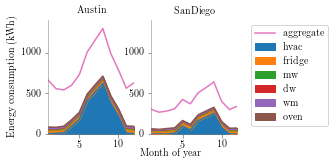

In [30]:
latexify(columns=1)
year = 2014
means = {}
for source in ['Austin','SanDiego']:
    source_df, source_dfc, source_tensor, source_static = create_region_df_dfc_static(source, year)
    means[source] = {}
    for appliance in APPLIANCES_ORDER:
        means[source][appliance] = source_df[['{}_{}'.format(appliance, month) for month in range(1, 13)]].mean()
        means[source][appliance].index = range(1, 13)

fig, ax  = plt.subplots(ncols=2)
for col, region in enumerate(['Austin','SanDiego']):
    (pd.DataFrame(means[region])[APPLIANCES_ORDER[1:]]).plot(kind='area', stacked=True, ax=ax[col], legend=False)
    pd.DataFrame(means[region])['aggregate'].plot(ax=ax[col], title="{}".format(region), legend=False)
ax[0].set_ylim((0, 1400))    
ax[1].set_ylim((0, 1400)) 
#ax[2].set_ylim((0, 800))    
format_axes(ax[0])
format_axes(ax[1])
l = plt.legend(bbox_to_anchor=(1.1, 1))

t = fig.text(0.5, -0.02, "Month of year")

q = ax[0].set_ylabel("Energy consumption (kWh)")
plt.savefig("../figures/region-energy.pdf", bbox_inches="tight", bbox_extra_artists=[l, t, q])


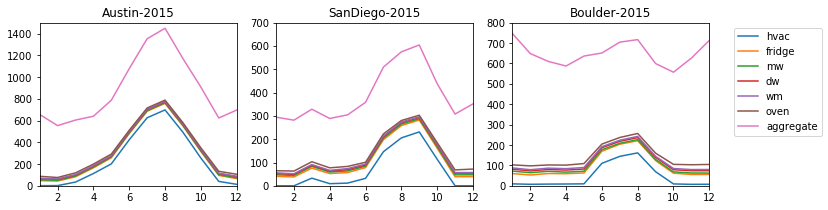

In [9]:
year = 2015
means = {}
for source in ['Austin','SanDiego','Boulder']:
    source_df, source_dfc, source_tensor, source_static = create_region_df_dfc_static(source, year)
    means[source] = {}
    for appliance in APPLIANCES_ORDER:
        means[source][appliance] = source_df[['{}_{}'.format(appliance, month) for month in range(1, 13)]].mean()
        means[source][appliance].index = range(1, 13)

fig, ax  = plt.subplots(ncols=3, figsize=(12, 3))
for col, region in enumerate(['Austin','SanDiego','Boulder']):
    (pd.DataFrame(means[region])[APPLIANCES_ORDER[1:]]).plot(kind='line', stacked=True, ax=ax[col], legend=False)
    pd.DataFrame(means[region])['aggregate'].plot(ax=ax[col], title="{}-{}".format(region, year), legend=False)
ax[0].set_ylim((0, 1500))    
ax[1].set_ylim((0, 700)) 
ax[2].set_ylim((0, 800))    
plt.legend(bbox_to_anchor=(1.1, 1))

(0, 700)

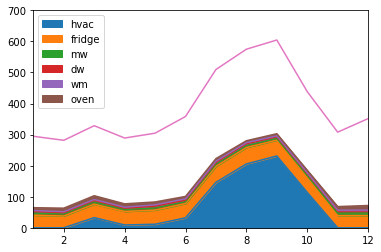

In [68]:
region = 'SanDiego'
(pd.DataFrame(means[region])[APPLIANCES_ORDER[1:]]).plot(kind='area', stacked=True)
pd.DataFrame(means[region])['aggregate'].plot()
plt.ylim((0, 700))

(0, 800)

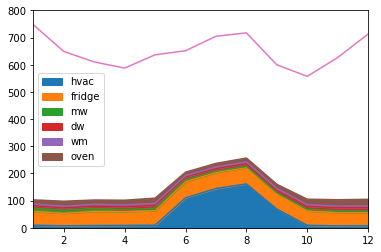

In [70]:
region = 'Boulder'
(pd.DataFrame(means[region])[APPLIANCES_ORDER[1:]]).plot(kind='area', stacked=True)
pd.DataFrame(means[region])['aggregate'].plot()
plt.ylim((0, 800))

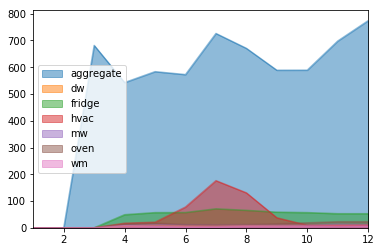

In [26]:
pd.DataFrame(means['Boulder']).plot(kind='area', stacked=False)

In [61]:
year = 2015
means = {}
for source in ['Austin','SanDiego','Boulder']:
    source_df, source_dfc, source_tensor, source_static = create_region_df_dfc_static(source, year)
    means[source] = {}
    for appliance in APPLIANCES_ORDER:
        means[source][appliance] = source_df[['{}_{}'.format(appliance, month) for month in range(1, 13)]].mean()
        means[source][appliance].index = range(1, 13)

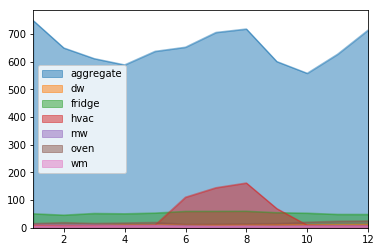

In [62]:
pd.DataFrame(means['Boulder']).plot(kind='area', stacked=False)

In [63]:
pd.DataFrame(means['Houston']).plot(kind='area', stacked=False)

KeyError: 'Houston'

In [64]:
source_df

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,dr_11,dr_12,num_rooms,area,num_bedrooms,num_floors,area_first,area_second,area_third,total_occupants
232,16.138151,14.620816,15.506550,14.606067,15.056300,288.439026,550.919983,553.263855,232.458511,17.814966,...,42.468552,28.940968,NaN,2228.0,NaN,NaN,1086.0,638.0,NaN,NaN
516,0.000000,0.000000,0.000000,0.225817,1.093633,52.086369,62.062866,65.778763,7.129300,0.000000,...,NaN,NaN,NaN,2379.0,NaN,NaN,1522.0,117.0,NaN,NaN
547,0.171450,0.129883,0.121850,0.167050,0.729517,11.363200,43.214214,44.240582,16.611950,0.217850,...,77.767265,118.365952,NaN,2920.0,NaN,NaN,1772.0,1148.0,NaN,NaN
698,0.154433,0.200583,0.235067,0.248867,0.229117,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2370.0,NaN,NaN,966.0,756.0,NaN,NaN
1350,0.063100,0.056983,0.042267,3.793800,2.360433,130.364410,82.873398,81.036430,0.019950,1.518250,...,30.199467,39.240002,NaN,2332.0,NaN,NaN,786.0,798.0,NaN,NaN
1766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.460917,43.629734,NaN,2564.0,NaN,NaN,1498.0,1066.0,NaN,NaN
1879,0.631433,0.492433,0.265700,0.139150,0.128300,102.587936,53.725433,79.044380,8.830234,0.085783,...,NaN,NaN,NaN,4123.0,NaN,NaN,1773.0,1200.0,NaN,NaN
2523,17.835316,15.946950,11.642734,9.654783,6.780450,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4306.0,NaN,NaN,2464.0,400.0,NaN,NaN
2903,15.165500,12.463433,16.897415,18.823750,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3049.0,NaN,NaN,1705.0,NaN,NaN,NaN
2931,34.648052,31.515816,34.843868,35.915867,38.469116,299.897156,431.989410,457.655518,241.760452,28.426817,...,58.614750,41.292316,NaN,1143.0,NaN,NaN,1143.0,NaN,NaN,NaN


In [51]:
data_path = os.path.expanduser("~/git/scalable-nilm/create_dataset/metadata/all_regions_years_cleaned_z_score_5.pkl")

out_overall = pickle.load(open(data_path, 'r'))

In [55]:
out_overall[2014]['Boulder'].columns

Index([u'hvac_1', u'hvac_2', u'hvac_3', u'hvac_4', u'hvac_5', u'hvac_6',
       u'hvac_7', u'hvac_8', u'hvac_9', u'hvac_10',
       ...
       u'dr_11', u'dr_12', u'house_num_rooms', u'area', u'num_bedrooms',
       u'num_floors', u'area_first', u'area_second', u'area_third',
       u'num_occupants'],
      dtype='object', length=128)